# <center>FISH MEASUREMENT PREDICTION

### Predicting(estimate) weight ,height and width of fish

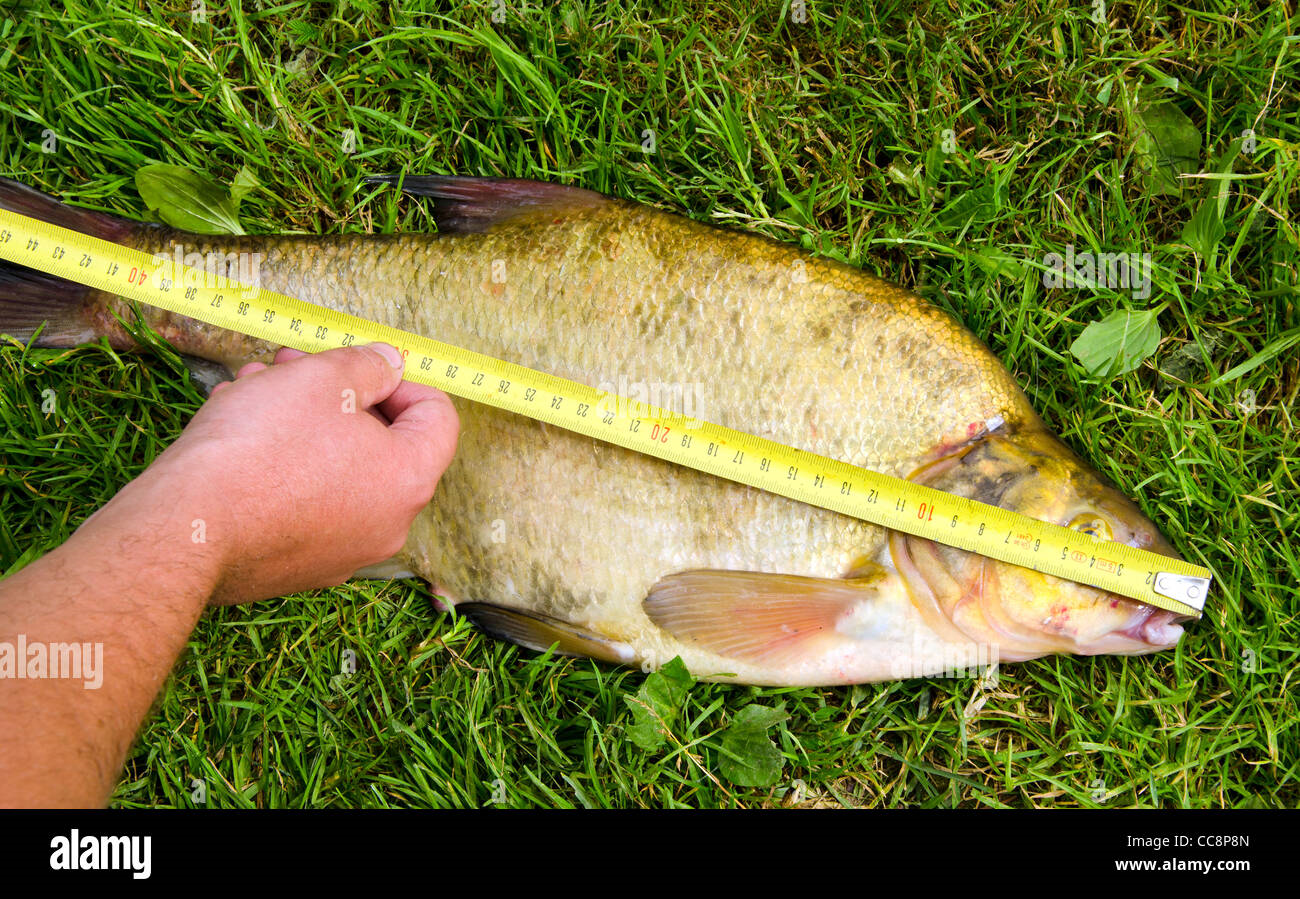

<div style="background-color:  yellow ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;">ABOUT DATASET</h1>
    
</div>

#### The fish measuring prediction dataset you are referring to seems to be the "Fish Measurements" dataset, which is commonly used for regression analysis and machine learning algorithms. This dataset includes the following features:
* Species: The species of the fish (e.g., Bream, Roach, Pike, etc.).
* Weight: The weight of the fish, measured in grams.
* Length1: The length of the fish from the tip of its head to the base of its tail, measured in centimeters
* Length2: The length of the fish from the tip of its head to the end of its body, measured in centimeters
* Length3: The length of the fish from the tip of its head to the end of its tail, measured in centimeters
* Height: The height of the fish, measured in centimeters
* Width: The width of the fish, measured in centimeters
#### This dataset is often used to train models to predict the weight of a fish based on its length, height, and width. The species of the fish is also included as a feature, as different species may have different weight-to-length ratios.

### Importing libraries

In [116]:
#Basic Analysis & Visualisation libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Data Preprocessing & Splitig libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

#Machine Learning Alogorithms libararies
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR 


#Machine Learning Model evaluation libraries
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [37]:
#Load the dataset
df=pd.read_csv(r"C:\Users\91948\OneDrive\Desktop\projects\Machine-Learning-Regression-Analysis-projects-main\FISH MEASURING PREDICTION\Fish.csv")
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

<div style="background-color:  yellow ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> DATA EXPLORATION
</h1>
    
</div>

In [38]:
#Checking dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [39]:
#Checking sample size of whole data
df.sample()

Species  Weight  Length1  Length2  Length3   Height   Width
125   Perch  1100.0     40.1     43.0     45.5  12.5125  7.4165

In [40]:
df.tail()

Species  Weight  Length1  Length2  Length3  Height   Width
154   Smelt    12.2     11.5     12.2     13.4  2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5  2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8  2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2  2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2  2.9322  1.8792

In [41]:
#Checking statistical analysis of numerical values 
df.describe()

Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000

In [42]:
#checking for duplicated data
df.duplicated().sum()

0

In [43]:
#To drop the duplicates
df.drop_duplicates(inplace=True)

In [44]:
#Checking dataset column and row numbers
df.shape

(159, 7)

In [45]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

perch is more in number 

In [46]:
#Checking missing value
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

## Data Visualisation Method

### Univariate Analysis

### Box plot(Whisker Plot)

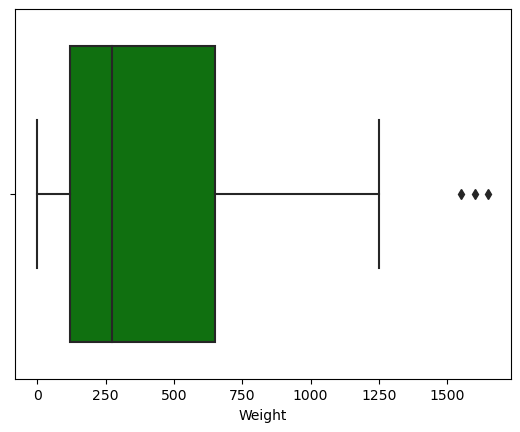

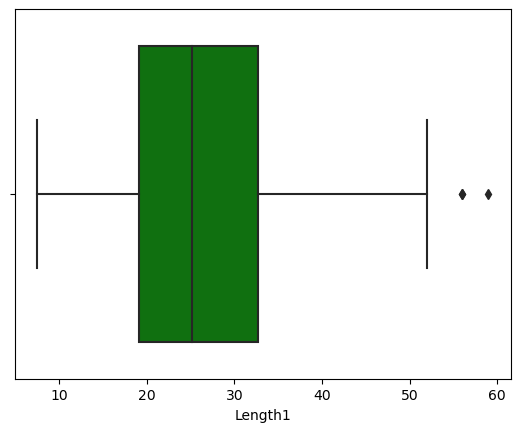

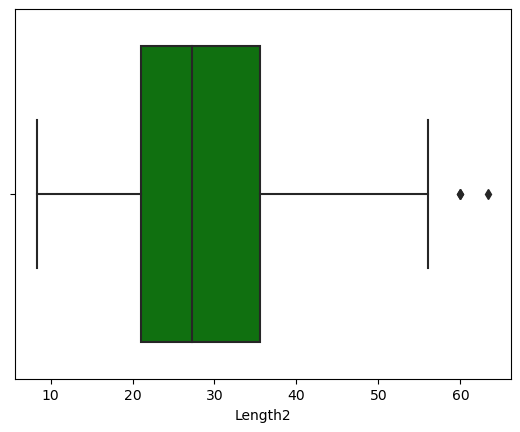

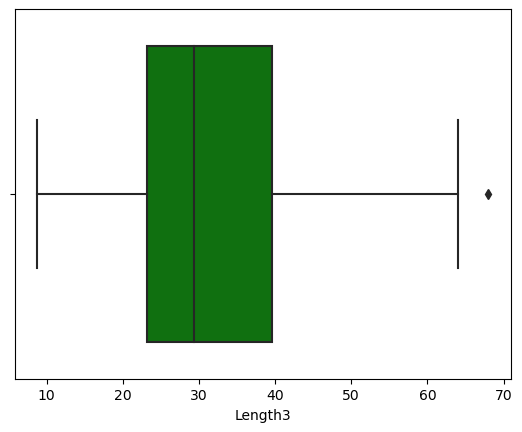

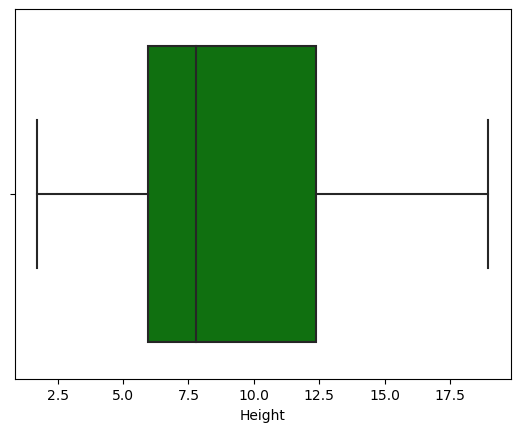

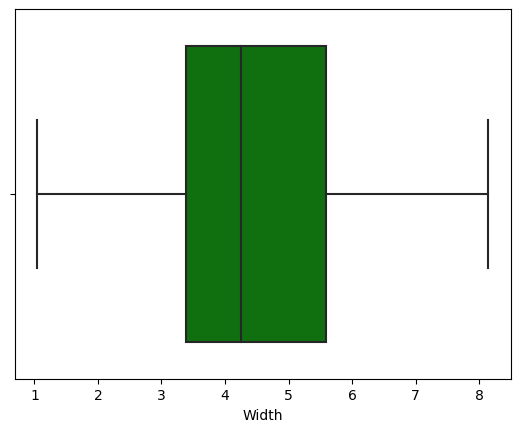

In [47]:
#Shows how the data is distributed and it also shows any outliers #checking outliers of all numerical columns 
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(x=df[i],color="green")
        plt.show()                           

<div style="background-color:  yellow ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> EXPLORATORY DATA ANALYSIS(EDA)
</h1>
    
</div>


### Hist plot

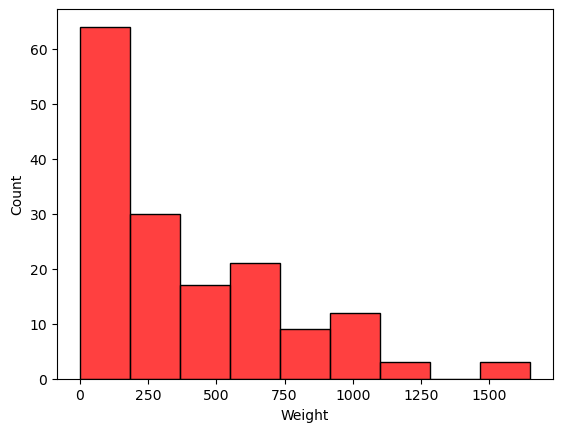

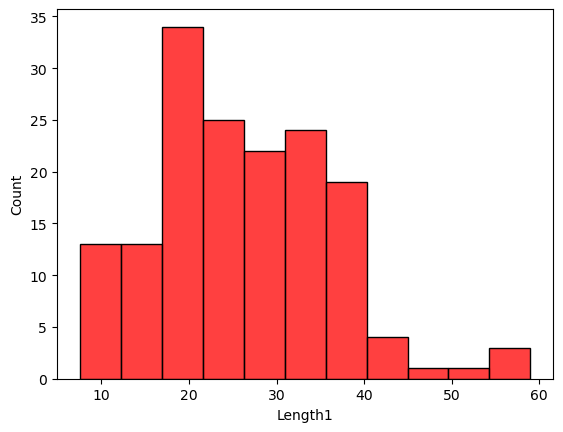

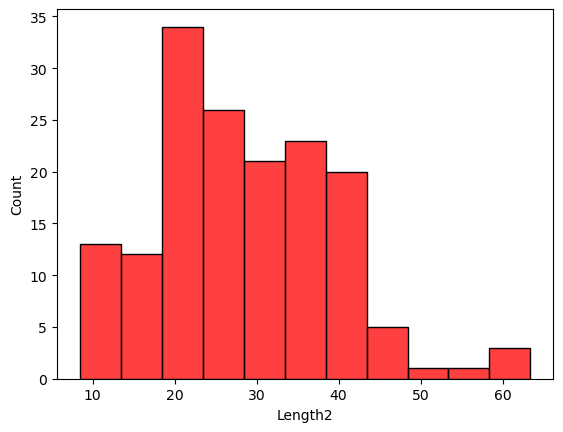

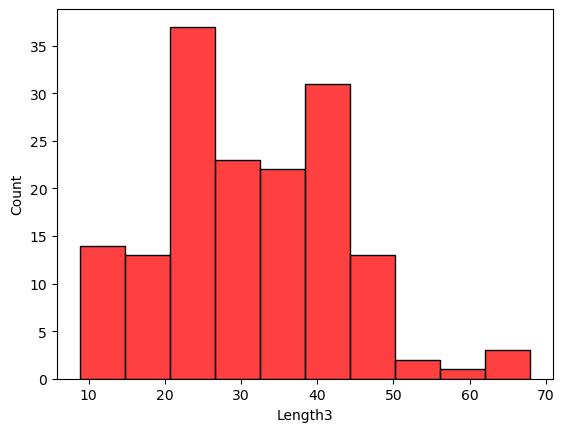

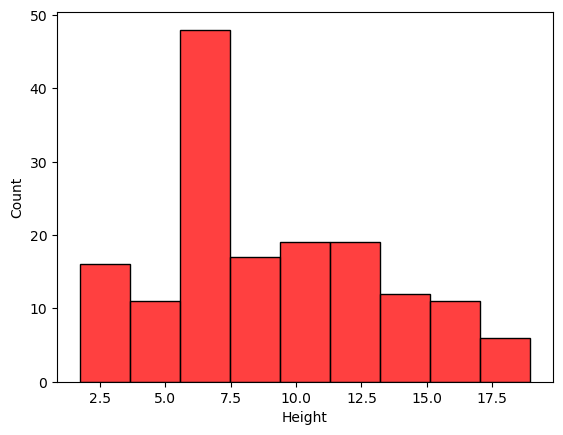

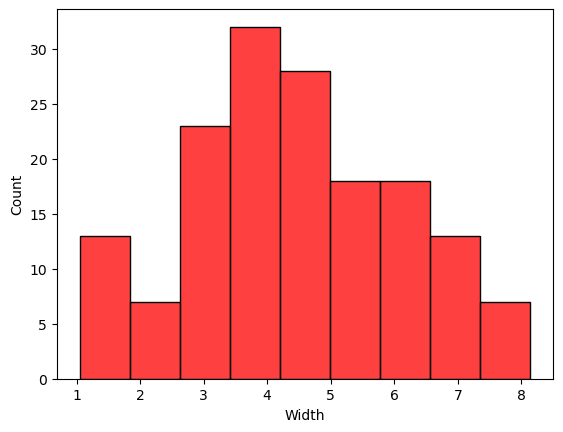

In [48]:
#checking whither the data is normally distributed or not
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i],color='red')
        plt.show();

 here we can observe that almost all the columns are normally distributed

### Kde plot (Kernal Density Estimate plot)

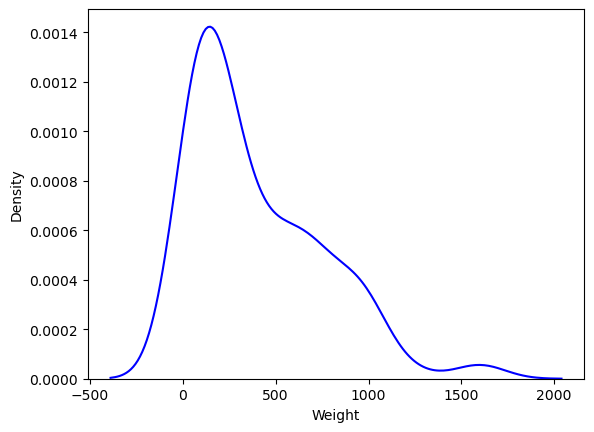

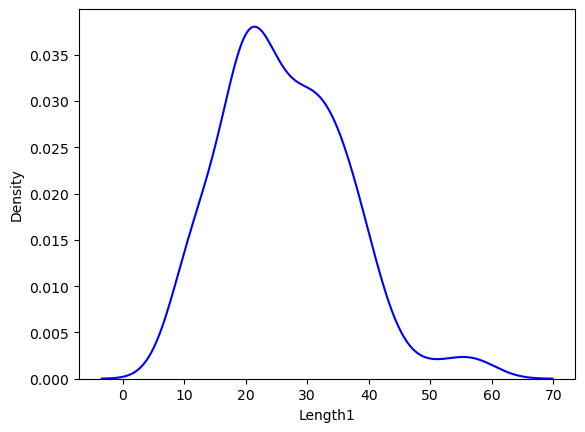

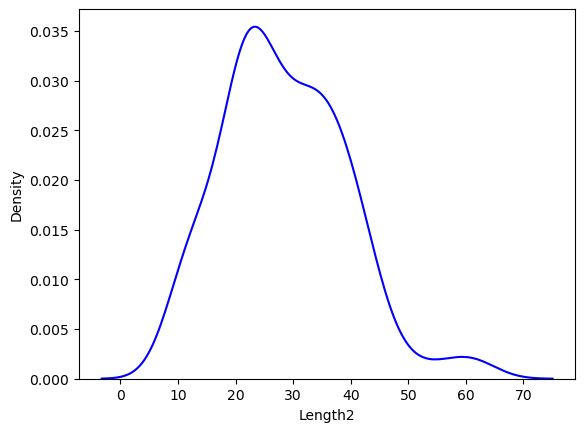

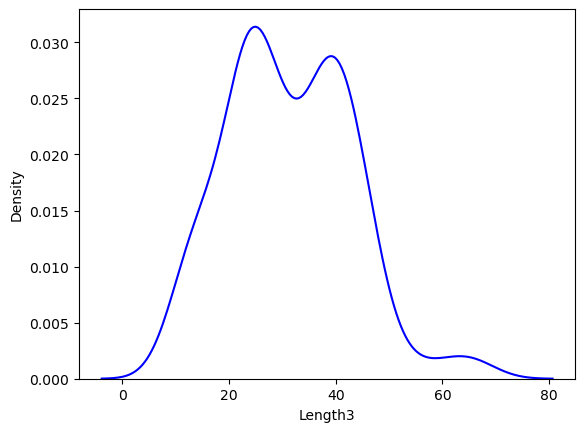

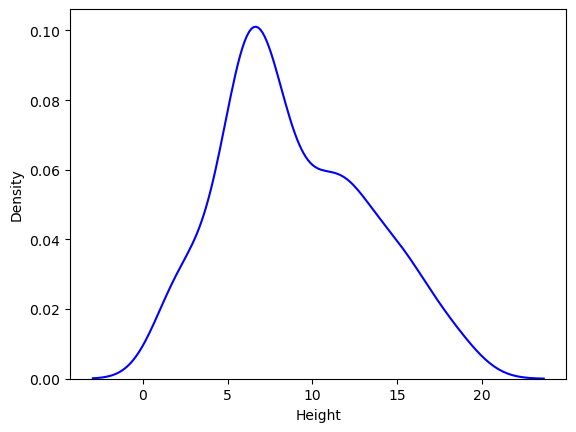

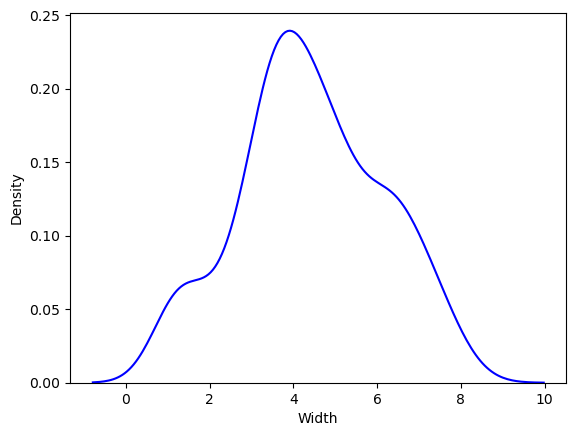

In [49]:
#To check whether it is uniform distribution (Density) or not
for i in df.columns:
    if df[i].dtypes != "object":
        sns.kdeplot(x =df[i],color="b" )
        plt.show()

### Strip plot

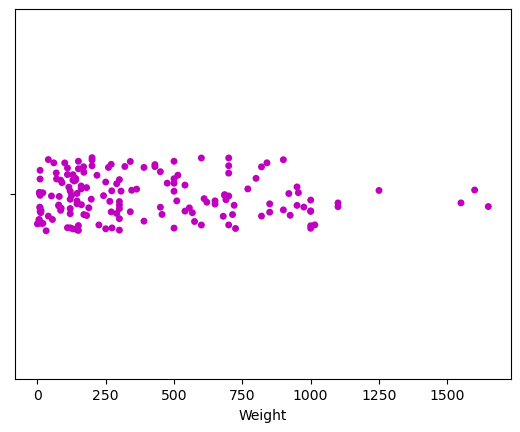

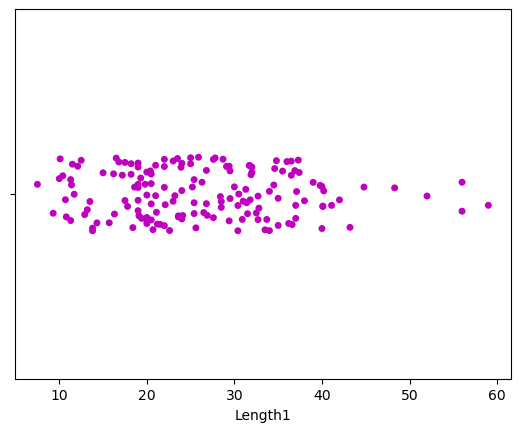

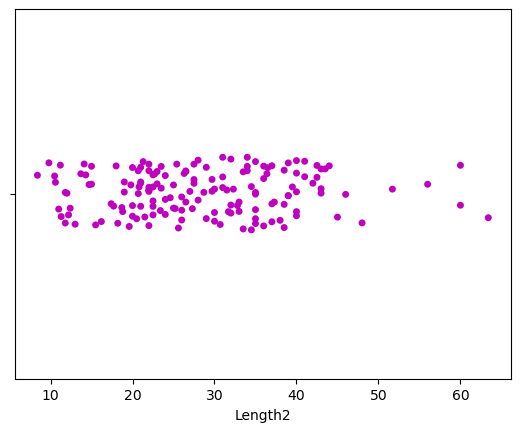

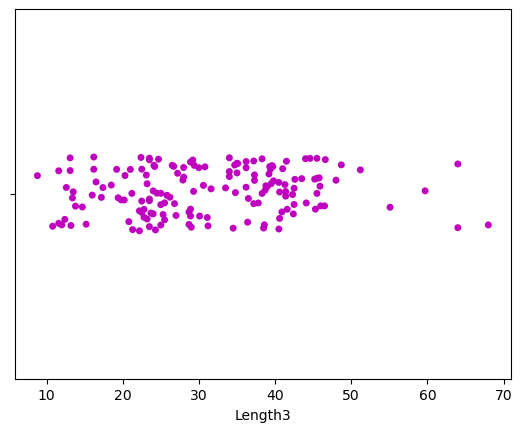

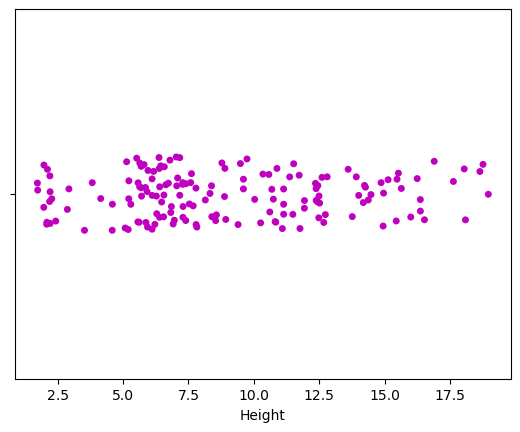

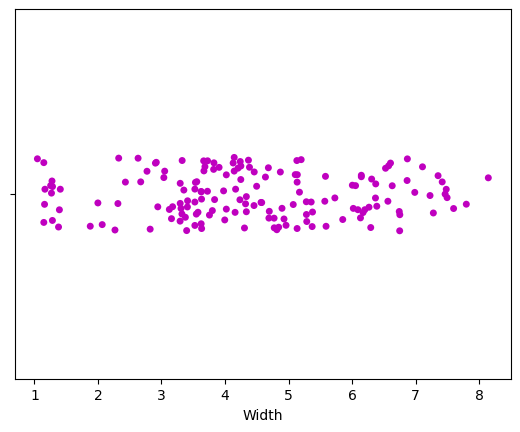

In [50]:
#visualise the distribution of many individual one-dimensional values
for i in df.columns:
    if df[i].dtypes != "object":
        sns.stripplot(x =df[i],color='m' )
        plt.show()

 here we can observe some outiers as observed in boxplot length 3 , 2 , 1 has more extreme values as compare to other columns

### Multivariate analysis

### Bar plot

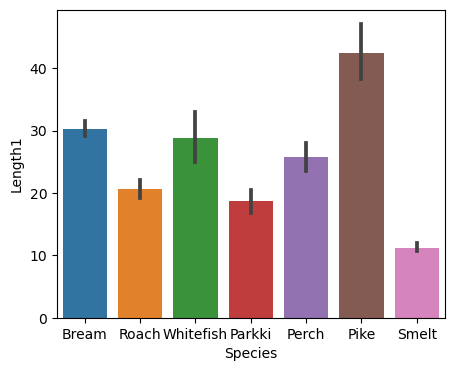

In [51]:
#it is to convey relational information quickly in a visual manner
plt.figure(figsize=(5,4))
sns.barplot(x='Species',y='Length1',data=df);

here we can observe pike and bream highest species in terms of length

<AxesSubplot:xlabel='Species', ylabel='Weight'>

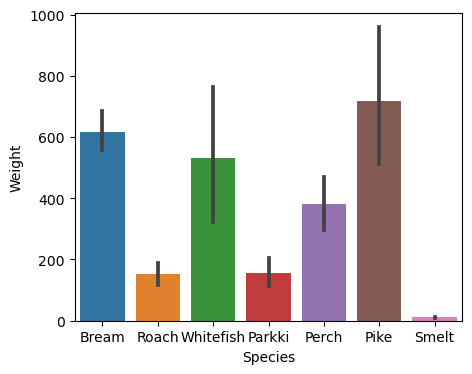

In [52]:
plt.figure(figsize=(5,4))
sns.barplot(x='Species',y='Weight',data=df)

same in this case also

### Line chart

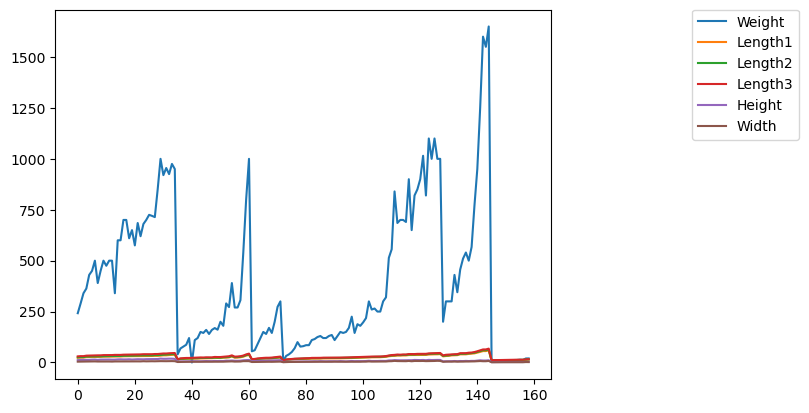

In [53]:
#to connects a series of data points using a line
df.plot.line()
plt.legend(bbox_to_anchor=(1.5,1),loc='upper right',borderaxespad=0)
plt.show()

## Pair plot

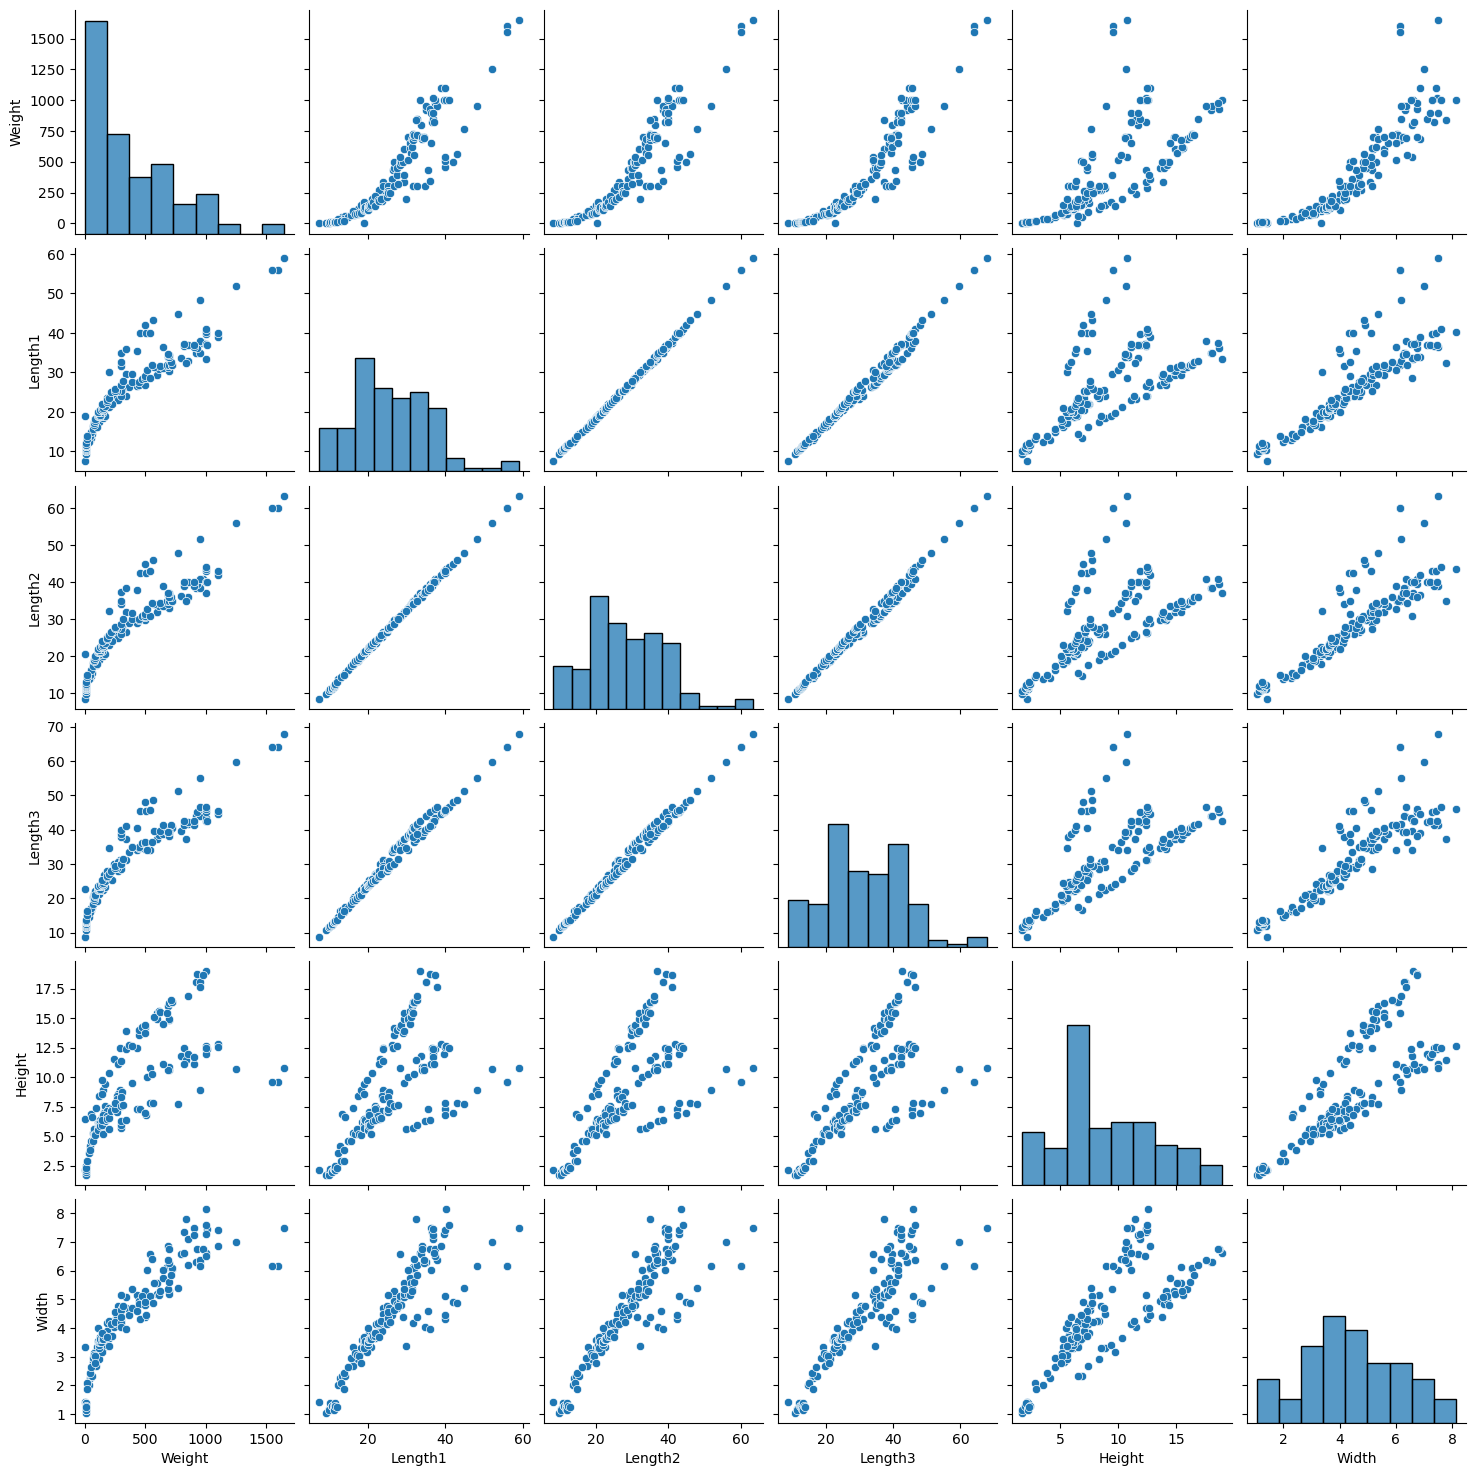

In [54]:
#A pairwise relationships between different  variables in a dataset
sns.pairplot(df);

In [55]:
#To connects a series of data points using a line
x=df.groupby(['Species'])['Weight'].sum()
x.reset_index()

Species   Weight
0      Bream  21624.0
1     Parkki   1703.0
2      Perch  21405.4
3       Pike  12218.0
4      Roach   3041.0
5      Smelt    156.5
6  Whitefish   3186.0

In [56]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [57]:
y=df.groupby(['Species'])['Height'].sum()
y.reset_index()

Species    Height
0      Bream  531.4124
1     Parkki   98.5867
2      Perch  440.2647
3       Pike  131.1341
4      Roach  133.8959
5      Smelt   30.9312
6  Whitefish   60.1630

 in case of height also bream is tallest category

In [58]:
y=df.groupby('Species')['Width'].sum()
y.reset_index()

Species     Width
0      Bream  189.9665
1     Parkki   35.4281
2      Perch  265.7605
3       Pike   86.4685
4      Roach   73.1570
5      Smelt   18.7613
6  Whitefish   32.8383

in case of width also bream contributes more

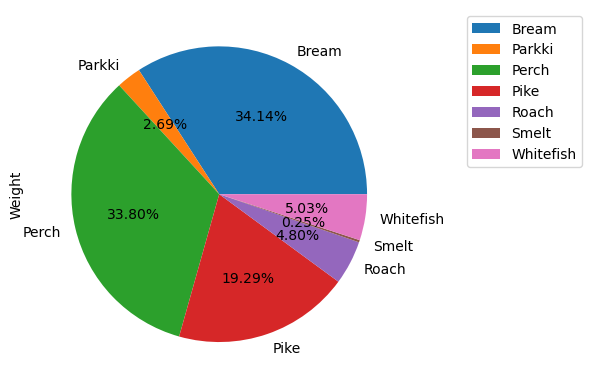

In [59]:
x.plot.pie(autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

here we can cleary see that bream has around 37.26% of species data followed by perch 30.87% then all other minour percent 

Removing outliers through iqr method 

In [60]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[70,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5%Q1
    return UL,LL

In [61]:
for column in df.columns:
    if df[column].dtype !="object":
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL) |(df[column]<LL),np.nan,df[column])

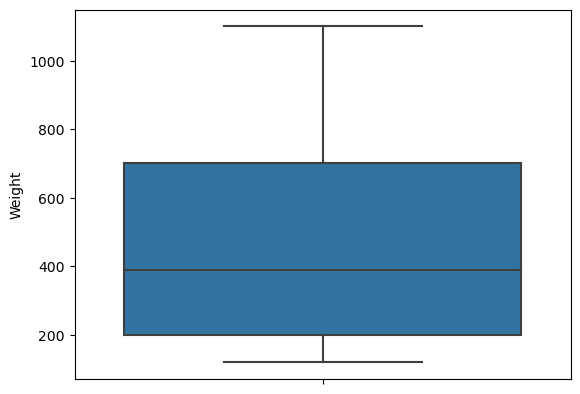

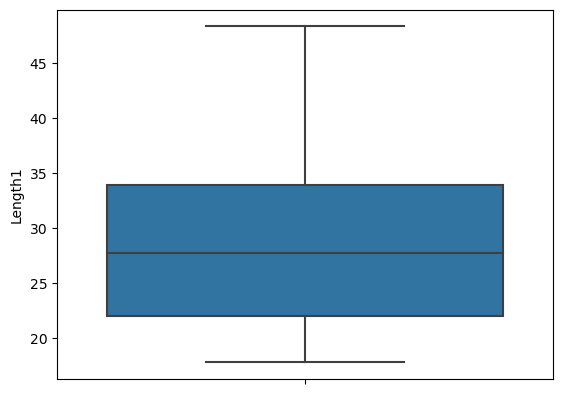

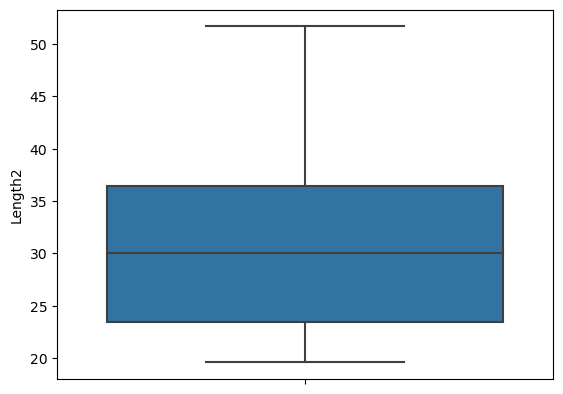

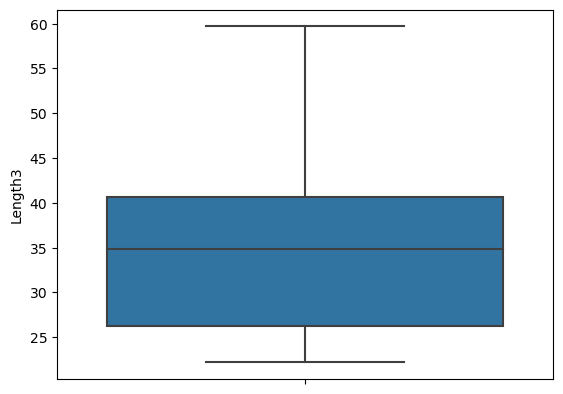

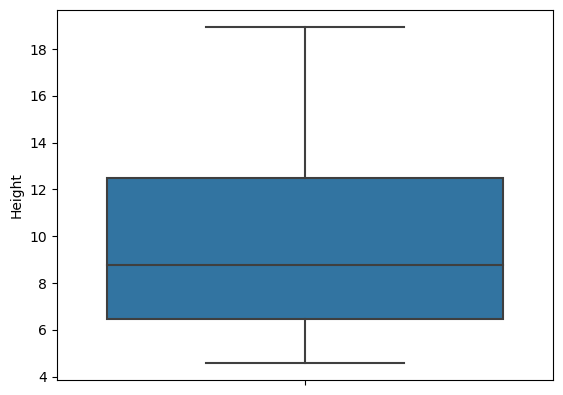

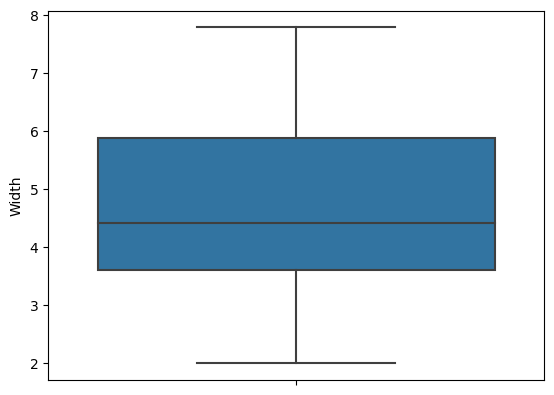

In [62]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.boxplot(y = df[i])
        plt.show();

In [90]:
df.dropna(inplace=True)

### We can see that now outliers have been removed from every column

### Label Encoding (here we can observe that species is categorical column as there is no order maintained within it so here we can go for using one hot encoding(label_encoding)

In [91]:
#Encoding the categorical data to numerical
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [92]:
df['Species'].value_counts()

2    42
0    35
4    14
3    13
1     7
5     6
Name: Species, dtype: int64

so species column have been converted to numerical column 

In [93]:
df.shape

(117, 7)

### Checking the correlation with the target 'Weight'

<AxesSubplot:>

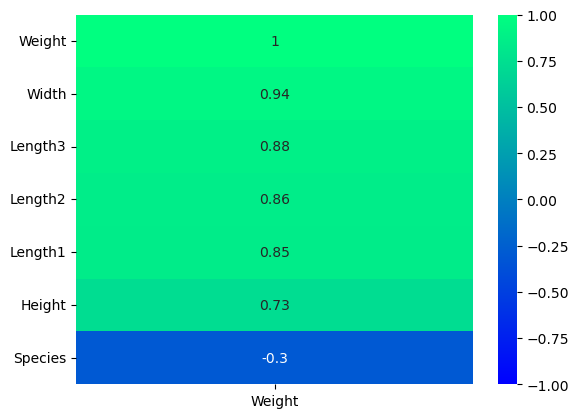

In [145]:
sns.heatmap(df.corr()[['Weight']].sort_values(by='Weight',ascending=False),vmin=-1,vmax=1,annot=True,cmap='winter')

### taking the variables which has good correlation with the target variables

<div style="background-color:  yellow ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> MODEL SELECTION AND TRAINING
</h1>
    
</div>

### Selecting target(y) and independent varible(X)

In [95]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

# select target varibale(Y) and independent varibale(x)

In [96]:
#Drop the target column from the X variable
x=df[['Width','Length3','Length2','Length1','Height']].values
#Create Y variable with target column
y=df[['Weight']].values

# Scaling and fit transform

 At first we will do Feature Scaling to shrink our data values for better result

In [97]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [98]:
df

Species  Weight  Length1  Length2  Length3   Height   Width
0          0   242.0     23.2     25.4     30.0  11.5200  4.0200
1          0   290.0     24.0     26.3     31.2  12.4800  4.3056
2          0   340.0     23.9     26.5     31.1  12.3778  4.6961
3          0   363.0     26.3     29.0     33.5  12.7300  4.4555
4          0   430.0     26.5     29.0     34.0  12.4440  5.1340
..       ...     ...      ...      ...      ...      ...     ...
136        3   540.0     40.1     43.0     45.8   7.7860  5.1296
137        3   500.0     42.0     45.0     48.0   6.9600  4.8960
138        3   567.0     43.2     46.0     48.7   7.7920  4.8700
139        3   770.0     44.8     48.0     51.2   7.6800  5.3760
140        3   950.0     48.3     51.7     55.1   8.9262  6.1712

[117 rows x 7 columns]

In [101]:
df.shape

(117, 7)

 doing train test split 

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# building model linear regression

In [105]:
lr=LinearRegression()

In [107]:
lr.fit(x_train,y_train)

LinearRegression()

In [117]:
x_train.shape,y_train.shape

((93, 5), (93, 1))

In [109]:
lr_pred=lr.predict(x_test)

In [110]:
print('Mean Squared Error :',mean_squared_error(y_test,lr_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,lr_pred))
print('R2_score :',round(r2_score(y_test,lr_pred)*100,2),"%")

Mean Squared Error : 2997.396590675844
Mean Absolute Error : 47.38929841269705
R2_score : 95.76 %


In [114]:
lr.score(x_test, y_test)*100

95.76027426308775

# building model in Random Forest Classifier

In [121]:
RF=RandomForestRegressor()

In [122]:
RF.fit(x_train,y_train)

RandomForestRegressor()

In [123]:
x_train.shape,y_train.shape

((93, 5), (93, 1))

In [124]:
RF_pred=lr.predict(x_test)

In [125]:
print('Mean Squared Error :',mean_squared_error(y_test,RF_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,RF_pred))
print('R2_score :',round(r2_score(y_test,RF_pred)*100,2),"%")

Mean Squared Error : 2997.396590675844
Mean Absolute Error : 47.38929841269705
R2_score : 95.76 %


In [126]:
RF.score(x_test, y_test)*100

94.39769444239259

# building model in decisiontreeregressor

In [131]:
DT = DecisionTreeRegressor()

In [132]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [133]:
x_train.shape,y_train.shape

((93, 5), (93, 1))

In [134]:
pred_dt = DT.predict(x_test)

In [135]:
print('Mean Squared Error :',mean_squared_error(y_test,RF_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,RF_pred))
print('R2_score :',round(r2_score(y_test,RF_pred)*100,2),"%")

Mean Squared Error : 2997.396590675844
Mean Absolute Error : 47.38929841269705
R2_score : 95.76 %


# Training & Testing Score

In [139]:
training_score=model.score(x_train, y_train)*100
training_score

98.60725269777187

In [140]:
testing_score=model.score(x_train, y_train)*100
testing_score

98.60725269777187

# evaluation

In [141]:
y_pred = model.predict(x)

In [142]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)
OUTPUT.head()

ACTUAL  PREDICTION
0   242.0  255.268466
1   290.0  295.098086
2   340.0  303.983357
3   363.0  366.974970
4   430.0  436.446334

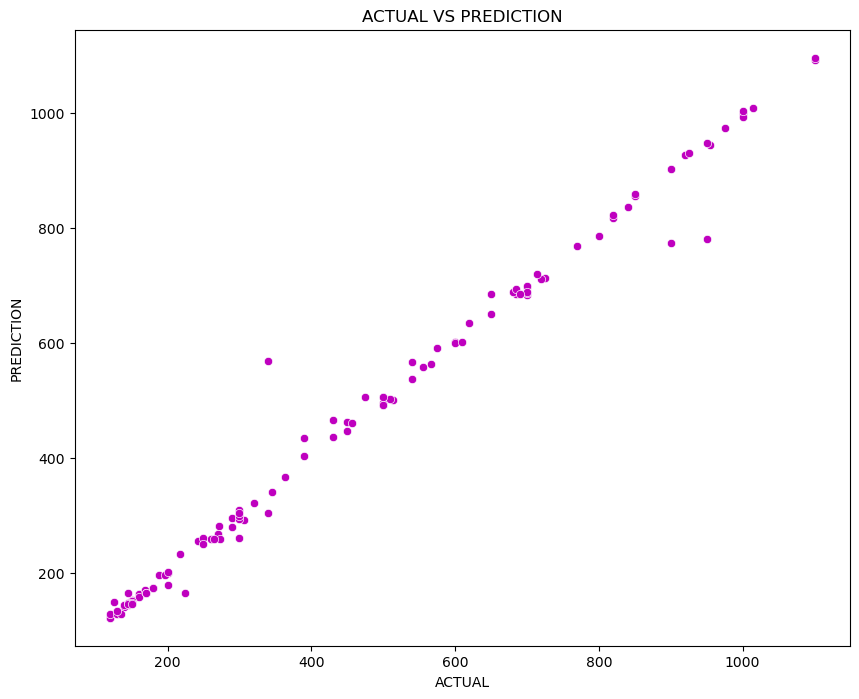

In [146]:
plt.figure(figsize=(10,8))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION",color='m');

# Conclusion 

# Based on the regression analysis performed on the fish measurement prediction, the following conclusions can be drawn:

>Relationship between variables: The regression analysis helps identify the relationship between the independent variables (such as length, weight, height, and width) and the dependent variable (fish measurements such as species, weight, or length). It provides insights into how changes in the independent variables impact the fish measurements.

->Statistical significance: The regression analysis provides statistical measures, such as coefficients and p-values, to assess the significance of the independent variables in explaining the variation in fish measurements. A significant p-value indicates that the variable has a meaningful impact on the fish measurements.

->Predictive power: The regression model can be used to predict fish measurements based on the identified relationships. By inputting values for the independent variables, the model can generate predictions for the fish's species, weight, length, or other measurements.

->Model evaluation: Various metrics, such as R-squared (coefficient of determination), adjusted R-squared, and root mean squared error (RMSE), can be used to evaluate the performance of the regression model. A higher R-squared value and a lower RMSE indicate a better fit of the model to the data.

->Assumptions: Regression analysis relies on assumptions, including linearity, independence of errors, homoscedasticity, and normality of residuals. It is important to assess these assumptions to ensure the validity of the regression model and the reliability of its predictions.

->Limitations: Regression analysis has its limitations, such as the assumption of a linear relationship between variables, potential presence of multicollinearity, and the inability to capture all factors that influence fish measurements. Other external factors, such as environmental conditions, food availability, or genetic factors, may also impact fish measurements and should be considered in conjunction with the regression analysis.

It is important to note that the accuracy and reliability of the predictions depend on the quality of the data, the choice of independent variables, and the suitability of the regression model for the specific dataset. Regular model evaluation and updating based on new data are essential for maintaining accurate predictions. Additionally, it may be valuable to explore other modeling techniques, such as decision trees or neural networks, to compare their performance against the regression model.